In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Importing Libraries used in thre analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

C:\Users\raona\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Importing Test and Train data
df = pd.read_csv('training_set.csv')
df_test = pd.read_csv('test_set.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Impurity.Percent  92 non-null     float64
 1   Impurity.Type     92 non-null     object 
 2   I                 92 non-null     float64
 3   II                92 non-null     float64
 4   III               92 non-null     float64
 5   IV                92 non-null     float64
 6   V                 92 non-null     float64
 7   Temp              92 non-null     float64
dtypes: float64(7), object(1)
memory usage: 5.9+ KB


<AxesSubplot:xlabel='I', ylabel='Impurity.Percent'>

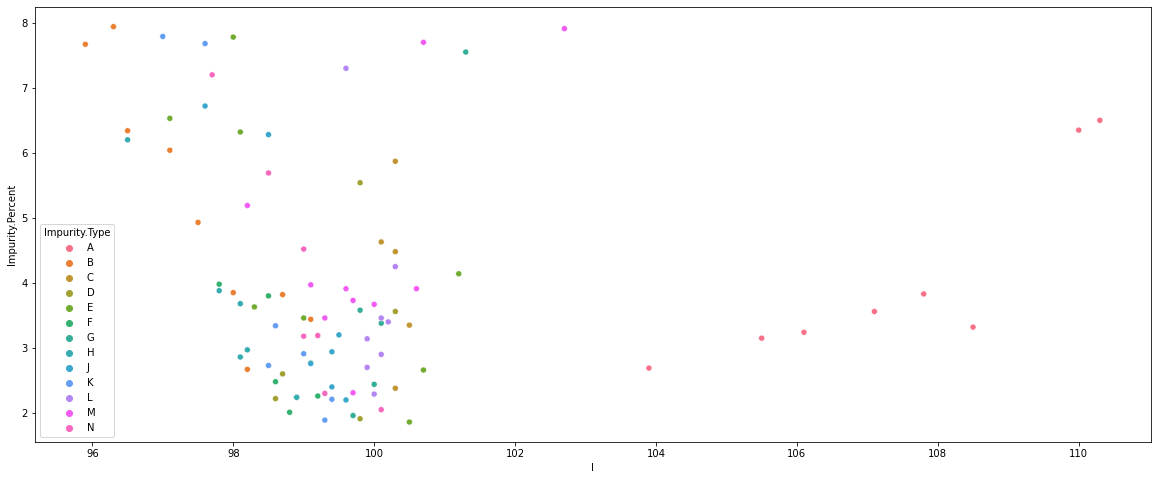

In [6]:
    fig,ax=plt.subplots(1,figsize=(20,8))
    sns.scatterplot(data=df, x='I',y='Impurity.Percent',hue='Impurity.Type',ax=ax)

<AxesSubplot:xlabel='II', ylabel='Impurity.Percent'>

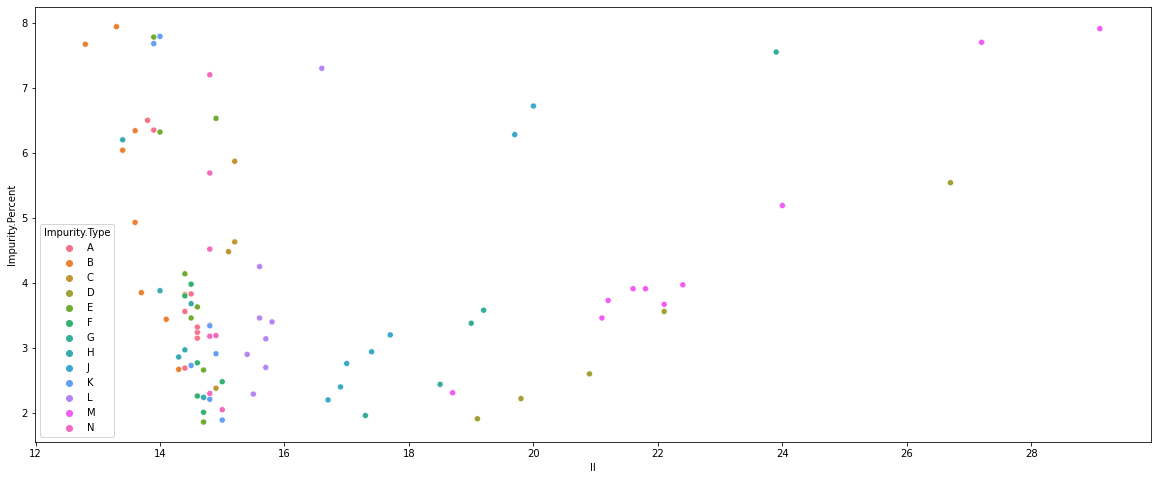

In [7]:
fig,ax=plt.subplots(1,figsize=(20,8))
sns.scatterplot(data=df, x='II',y='Impurity.Percent',hue='Impurity.Type',ax=ax)

<AxesSubplot:xlabel='III', ylabel='Impurity.Percent'>

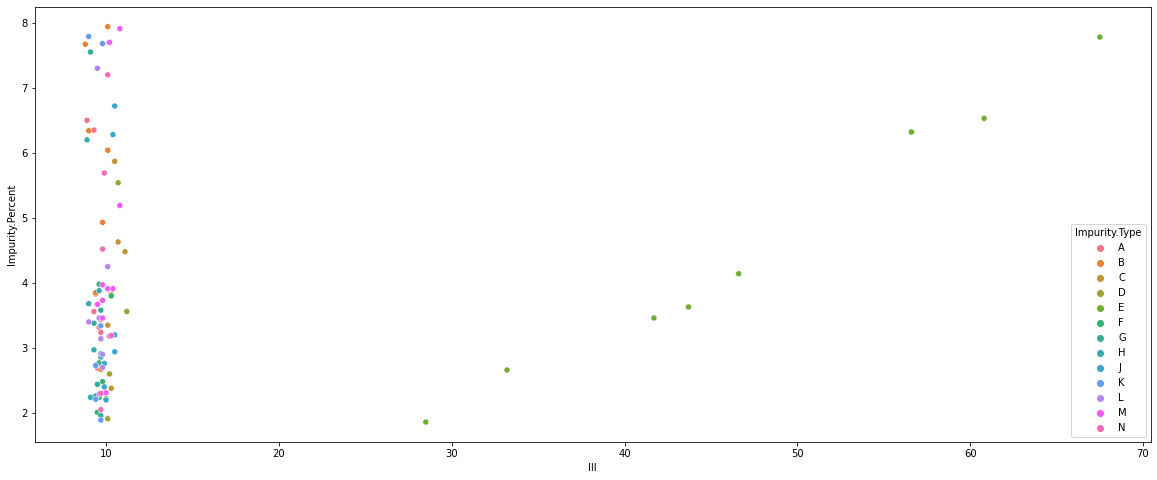

In [127]:
fig,ax=plt.subplots(1,figsize=(20,8))
sns.scatterplot(data=df, x='III',y='Impurity.Percent',hue='Impurity.Type',ax=ax)

<AxesSubplot:xlabel='IV', ylabel='Impurity.Percent'>

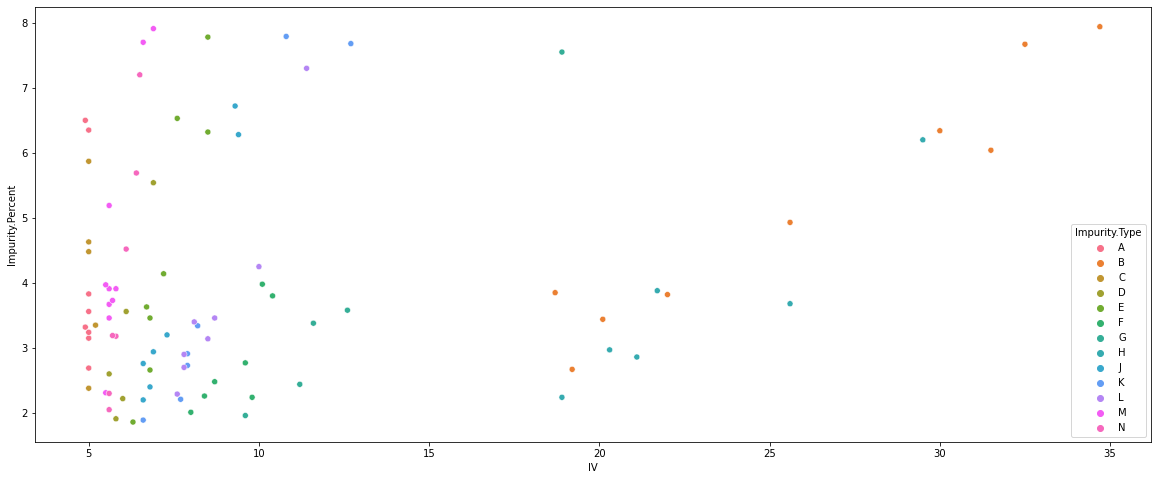

In [128]:
fig,ax=plt.subplots(1,figsize=(20,8))
sns.scatterplot(data=df, x='IV',y='Impurity.Percent',hue='Impurity.Type',ax=ax)

<AxesSubplot:xlabel='V', ylabel='Impurity.Percent'>

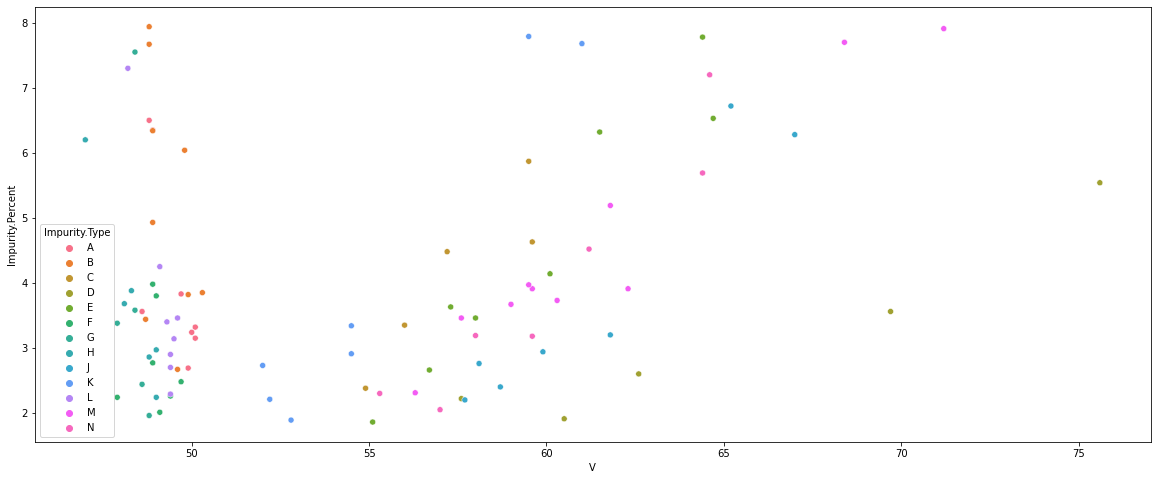

In [129]:
fig,ax=plt.subplots(1,figsize=(20,8))
sns.scatterplot(data=df, x='V',y='Impurity.Percent',hue='Impurity.Type',ax=ax)

<AxesSubplot:xlabel='Temp', ylabel='Impurity.Percent'>

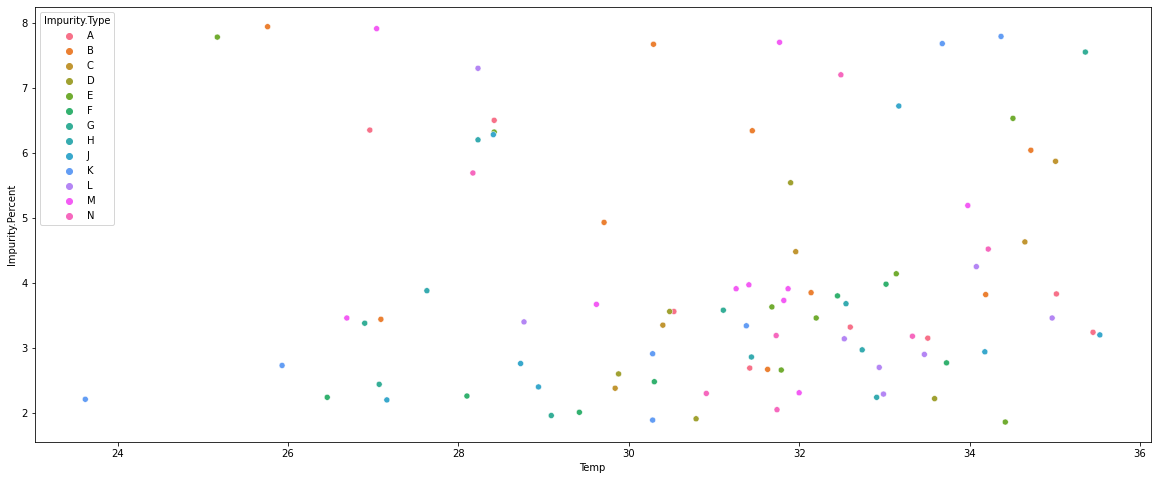

In [130]:
fig,ax=plt.subplots(1,figsize=(20,8))
sns.scatterplot(data=df, x='Temp',y='Impurity.Percent',hue='Impurity.Type',ax=ax)

<AxesSubplot:xlabel='I', ylabel='Temp'>

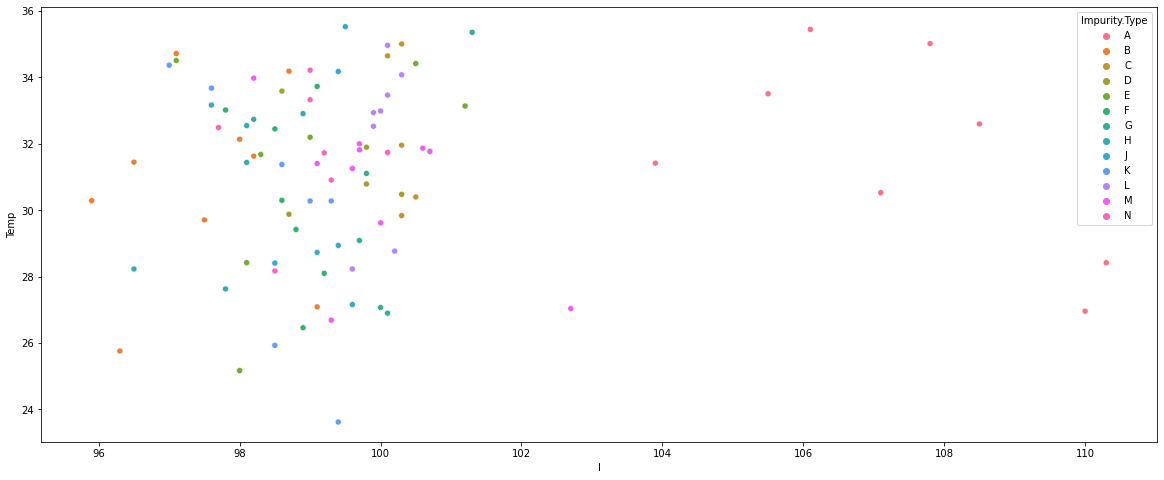

In [14]:
fig,ax=plt.subplots(1,figsize=(20,8))
sns.scatterplot(data=df, x='I',y='Temp',hue='Impurity.Type',ax=ax)

In [99]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()

In [131]:
Independent = df.drop(['Impurity.Type','Impurity.Percent'],axis= 'columns')
Dependent = df['Impurity.Type']

In [132]:
Independent.head()
Dependent.head()

0    A
1    A
2    A
3    A
4    A
Name: Impurity.Type, dtype: object

<AxesSubplot:>

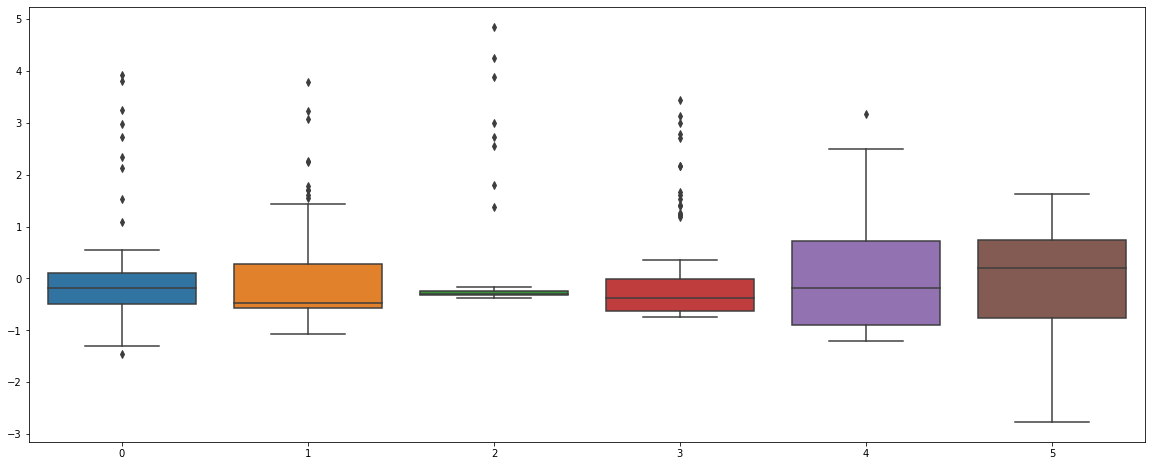

In [155]:
df_norm = df[['I','II','III','IV','V','Temp']]
from sklearn.preprocessing import StandardScaler
slr = StandardScaler()
df_norm1 = slr.fit_transform(df_norm)
df_norm2 = pd.DataFrame(df_norm1)
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=df_norm2,ax=ax) 

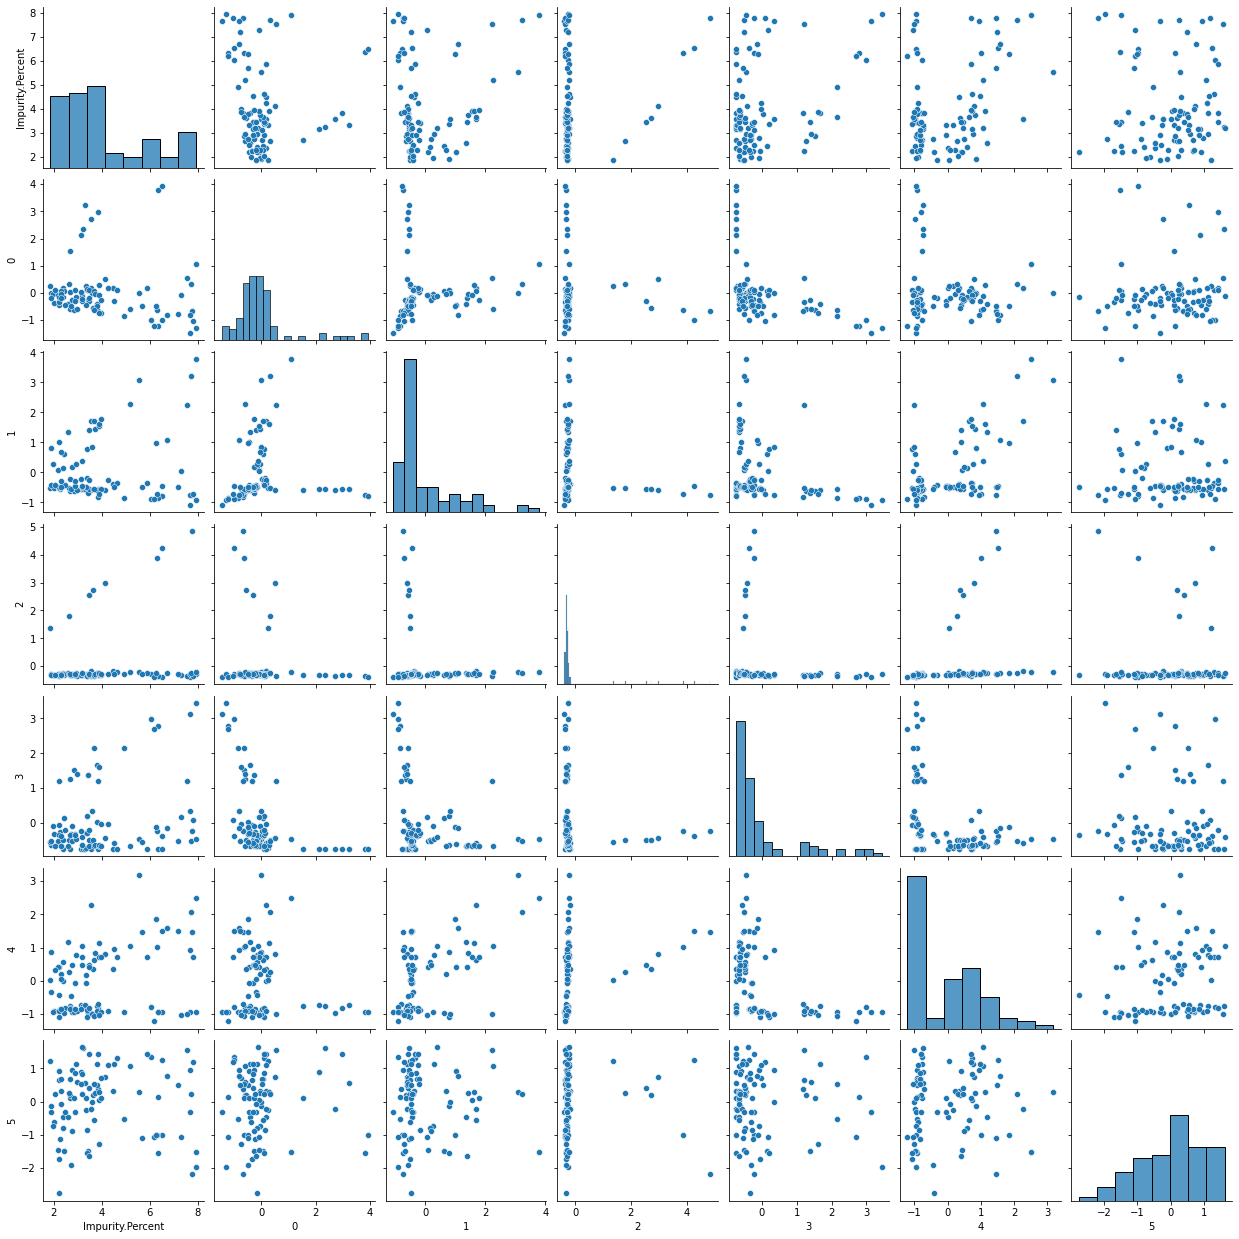

In [156]:
df_final =pd.concat([df[['Impurity.Percent','Impurity.Type']],df_norm2],axis=1)
sns.pairplot(df_final)

In [135]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3)
df_tsne = pd.DataFrame(tsne.fit_transform(Independent))

In [136]:
df_a = pd.concat([Dependent,df_tsne],axis = 1)


<AxesSubplot:xlabel='0', ylabel='1'>

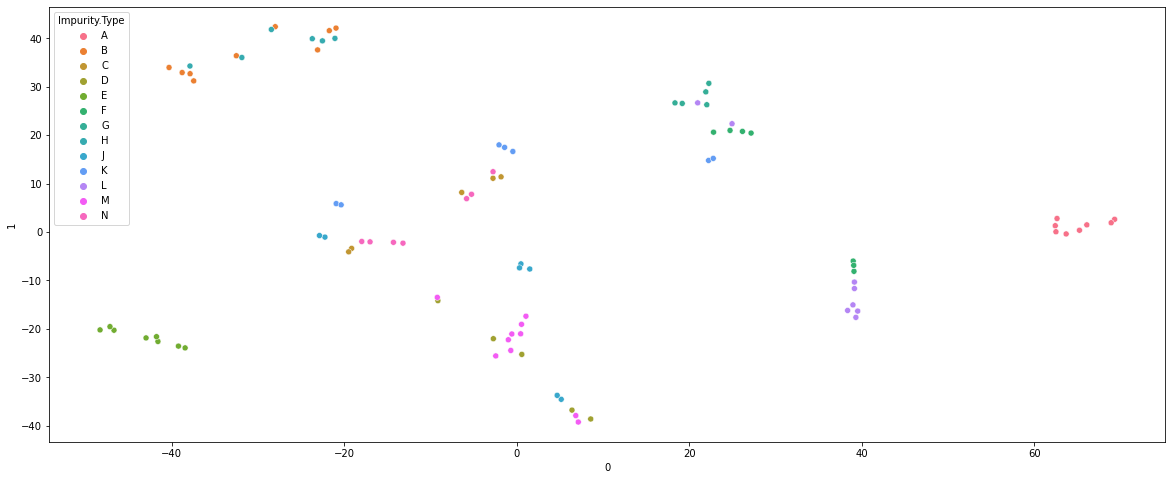

In [137]:
fig,ax=plt.subplots(1,figsize=(20,8))
sns.scatterplot(data=df_a, x=0,y=1,hue='Impurity.Type',ax=ax)

In [138]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(df_final.drop(['Impurity.Type','Impurity.Percent'],axis= 'columns'))
print(pca.explained_variance_ratio_)
pca_transform = pca.transform(df_final.drop(['Impurity.Type','Impurity.Percent'],axis= 'columns'))

[0.32574423 0.22292639 0.18355953 0.1650224  0.06633242]


In [139]:
df_final_1= pd.concat([df[['Impurity.Percent','Impurity.Type']],pd.DataFrame(pca_transform)],axis=1)

In [157]:

X.head()

,I,II,III,IV,V,Temp
0,103.9,14.4,9.5,5.0,49.9,31.42
1,105.5,14.6,9.7,5.0,50.1,33.51
2,106.1,14.6,9.7,5.0,50.0,35.45
3,108.5,14.6,9.6,4.9,50.1,32.60
4,107.1,14.4,9.3,5.0,48.6,30.53


In [158]:
#Splitting the training data into train and validation set
from sklearn.model_selection import train_test_split
y = df['Impurity.Type']
X = df.drop(['Impurity.Type','Impurity.Percent'],axis= 'columns')
Xs_train, Xs_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1, stratify=y)

In [159]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(Xs_train, y_train)
classifier_score = log_reg.score(Xs_test, y_test)

from sklearn.model_selection import cross_val_score
LRscores=cross_val_score(log_reg,X,y,cv=10)
print("Accuracy: %0.2f(+- %0.2f)" % (LRscores.mean(),LRscores.std()))

C:\Users\raona\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\raona\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\raona\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/s

Accuracy: 0.84(+- 0.11)


C:\Users\raona\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [143]:
df_test.head()

,I,II,III,IV,V,Temp
0,99.0,14.3,9.7,18.4,49.5,29.17
1,96.5,13.3,9.6,32.8,49.4,29.29
2,99.1,15.2,9.9,6.8,54.5,34.65
3,97.4,14.1,9.2,25.3,48.7,35.81
4,99.8,20.4,9.8,5.7,64.6,34.39


In [144]:
df_test_final =pd.concat([df_reg['yhat'],df_test],axis='columns')
df_test_final.head()

,yhat,I,II,III,IV,V,Temp
0,4.102635,99.0,14.3,9.7,18.4,49.5,29.17
1,4.052741,96.5,13.3,9.6,32.8,49.4,29.29
2,7.533985,99.1,15.2,9.9,6.8,54.5,34.65
3,5.629432,97.4,14.1,9.2,25.3,48.7,35.81
4,6.367154,99.8,20.4,9.8,5.7,64.6,34.39


In [67]:
df_test['yhat'] = log_reg.predict(df_test_final)

In [68]:
df_test.head()

,I,II,III,IV,V,Temp,yhat
0,99.0,14.3,9.7,18.4,49.5,29.17,H
1,96.5,13.3,9.6,32.8,49.4,29.29,B
2,99.1,15.2,9.9,6.8,54.5,34.65,L
3,97.4,14.1,9.2,25.3,48.7,35.81,B
4,99.8,20.4,9.8,5.7,64.6,34.39,M


In [69]:
df_test.to_csv('classification.csv',index= False)

In [83]:
from sklearn.svm import SVC
svm_clf = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', probability=True)
svm_clf.fit(Xs_train, y_train)
score_svmc=svm_clf.score(Xs_test, y_test)
SVRscore=cross_val_score(svm_clf,X,y,cv=10)
print("Accuracy: %0.2f(+- %0.2f)"%(SVRscore.mean(),SVRscore.std()))

C:\Users\raona\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Accuracy: 0.62(+- 0.17)


In [84]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(Xs_train, y_train)
knn_score = neigh.score(Xs_test,y_test)
print('The classifier accuracy score is {:03.2f}'.format(knn_score))

The classifier accuracy score is 0.61


In [85]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=13)
tree_clf.fit(Xs_train, y_train)
DTscore=cross_val_score(tree_clf,X,y,cv=10)
print("Accuracy: %0.2f(+- %0.2f)"%(DTscore.mean(),DTscore.std()))

Accuracy: 0.79(+- 0.17)


C:\Users\raona\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


In [160]:
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(max_depth=12, random_state=0,n_estimators=1000)
Classifier.fit(Xs_train, y_train)
rfscore=cross_val_score(Classifier,X,y,cv=10)
print("Accuracy: %0.2f(+- %0.2f)"%(rfscore.mean(),rfscore.std()))

C:\Users\raona\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Accuracy: 0.83(+- 0.07)


In [118]:
df.to_csv('classification_test.csv',index= False)

In [163]:
df_test.to_csv('classification.csv',index= False)

In [162]:
df_test.head()

,I,II,III,IV,V,Temp,g.hat
0,99.0,14.3,9.7,18.4,49.5,29.17,B
1,96.5,13.3,9.6,32.8,49.4,29.29,B
2,99.1,15.2,9.9,6.8,54.5,34.65,K
3,97.4,14.1,9.2,25.3,48.7,35.81,H
4,99.8,20.4,9.8,5.7,64.6,34.39,M
